# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

19:57:21 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=425835;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=502465;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=839905;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=609438;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=864090;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=367640;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

19:57:23 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=152063;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=493724;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

19:57:24 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=836869;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=825336;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

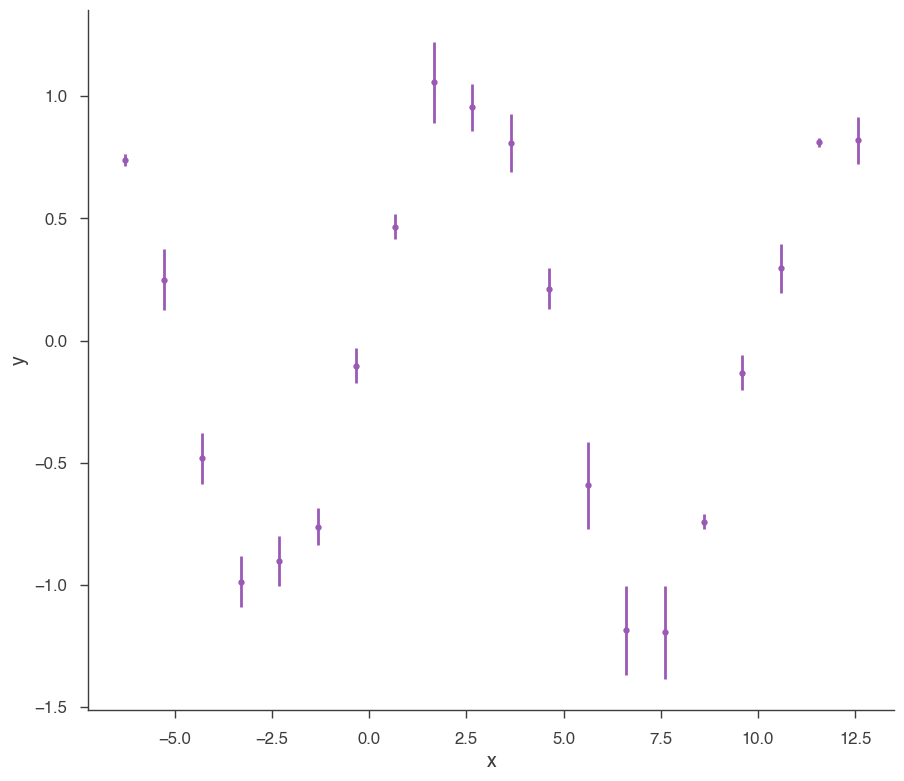

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

19:57:25 INFO      sampler set to emcee                                                    ]8;id=207588;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=744106;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

19:57:29 INFO      Mean acceptance fraction: 0.7186999999999999                                ]8;id=779343;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=822992;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

19:57:30 INFO      fit restored to maximum of posterior                                         ]8;id=222058;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=89092;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=884023;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=774317;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.19 +0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.003 -0.004 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.333671
total,-11.333671


Values of statistical measures:

,statistical measures
AIC,27.373225
BIC,28.658808
DIC,26.738204
PDIC,2.031432


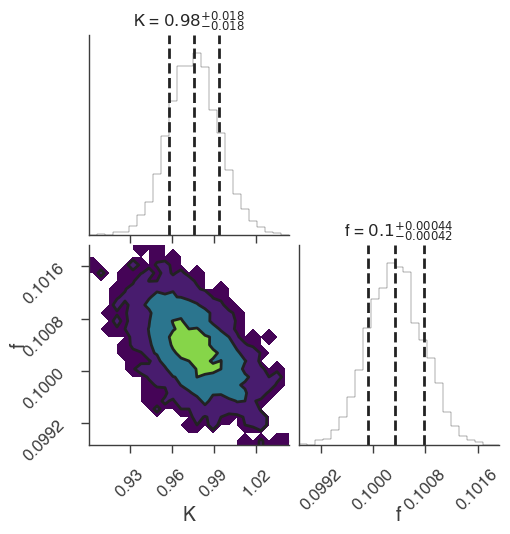

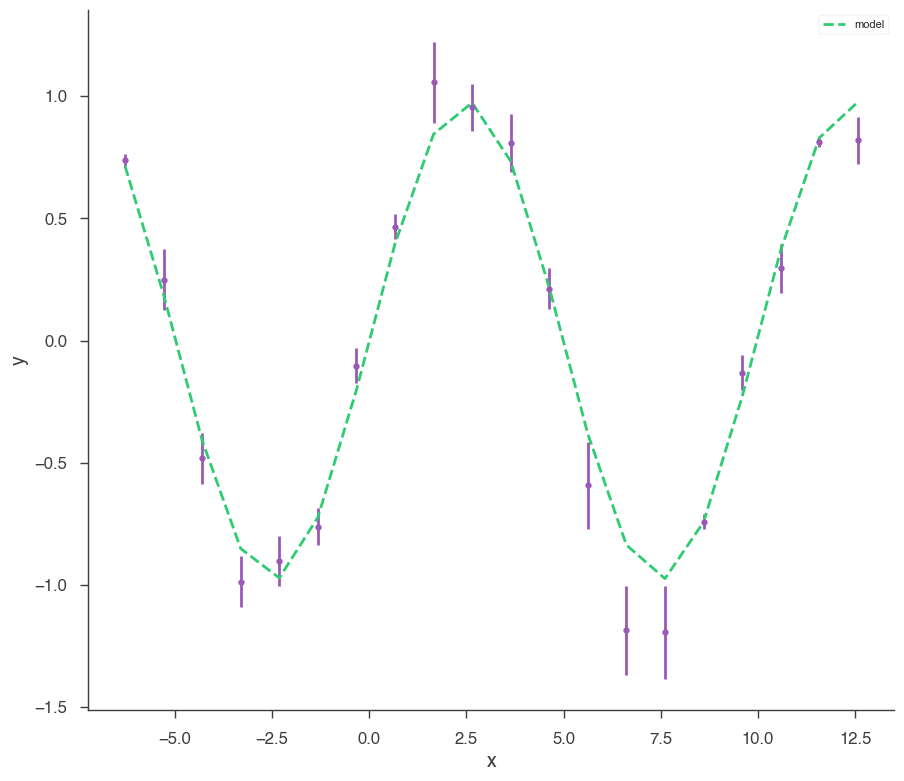

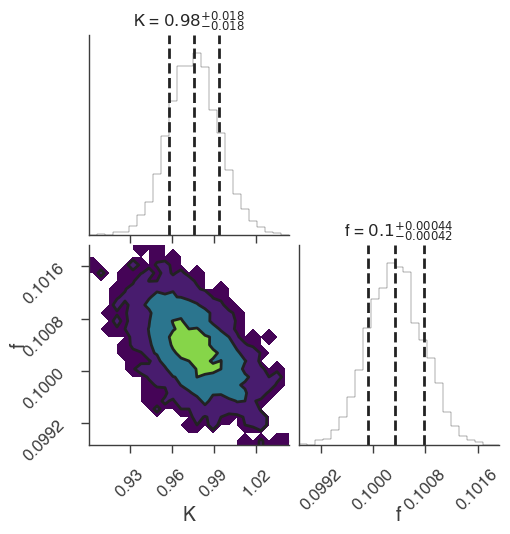

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

19:57:32 INFO      sampler set to multinest                                                ]8;id=750170;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=718160;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


 ln(ev)=  -20.514446100539050      +/-  0.14336838528919083     
 Total Likelihood Evaluations:         5485
  analysing data from chains/fit-.txt
 Sampling finished. Exiting MultiNest


19:57:35 INFO      fit restored to maximum of posterior                                         ]8;id=224484;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=312837;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=141570;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=919026;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.78 +/- 0.16) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.003 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.334277
total,-11.334277


Values of statistical measures:

,statistical measures
AIC,27.374437
BIC,28.660019
DIC,26.495909
PDIC,1.911875
log(Z),-8.909311


         INFO      deleting the chain directory chains                                     ]8;id=460608;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=950257;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

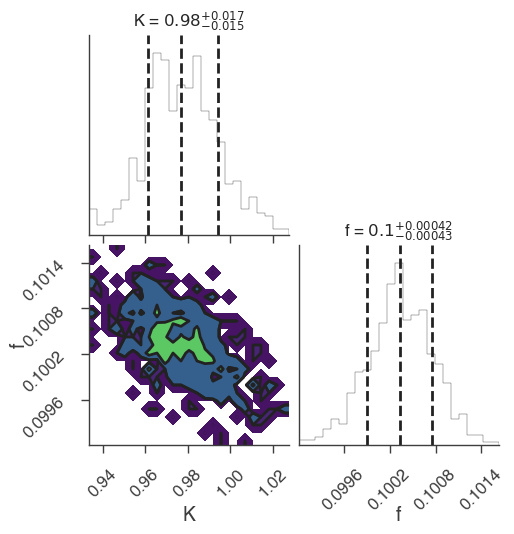

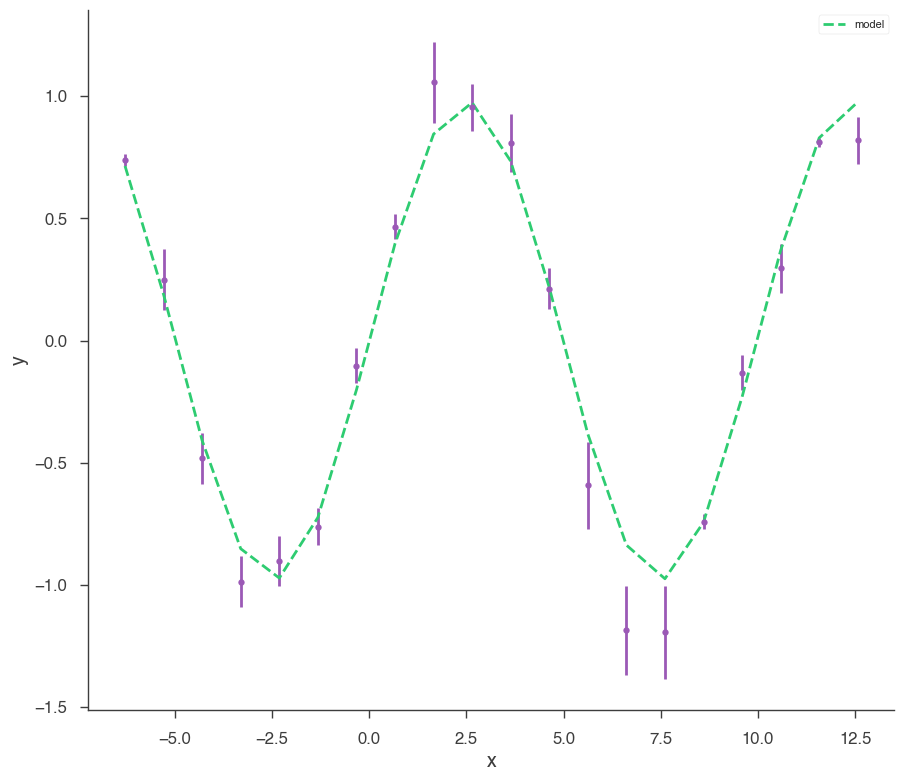

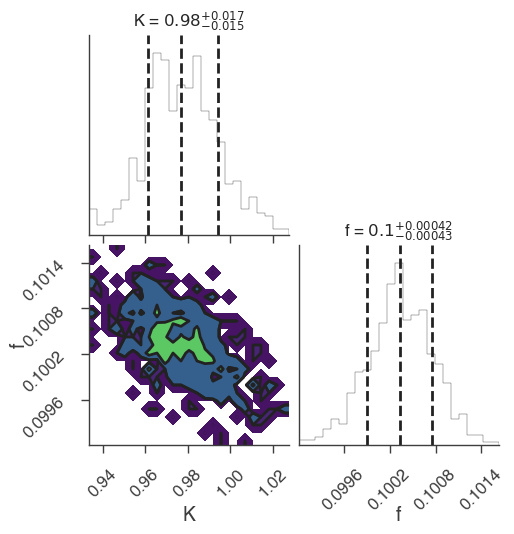

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

19:57:36 INFO      sampler set to dynesty_nested                                           ]8;id=295287;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=707053;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

202it [00:00, 2014.34it/s, bound: 0 | nc: 1 | ncall: 644 | eff(%): 31.366 | loglstar:   -inf < -4188.640 <    inf | logz: -4194.795 +/-  0.123 | dlogz: 4157.469 >  0.409]

404it [00:00, 1784.19it/s, bound: 0 | nc: 2 | ncall: 1043 | eff(%): 38.734 | loglstar:   -inf < -2819.108 <    inf | logz: -2826.724 +/-  0.136 | dlogz: 2807.483 >  0.409]

585it [00:00, 1345.20it/s, bound: 0 | nc: 4 | ncall: 1603 | eff(%): 36.494 | loglstar:   -inf < -2062.941 <    inf | logz: -2071.072 +/-  0.142 | dlogz: 2052.978 >  0.409]

730it [00:00, 1035.07it/s, bound: 0 | nc: 2 | ncall: 2356 | eff(%): 30.985 | loglstar:   -inf < -1590.813 <    inf | logz: -1598.940 +/-  0.136 | dlogz: 1577.037 >  0.409]

846it [00:00, 892.61it/s, bound: 0 | nc: 8 | ncall: 3088 | eff(%): 27.396 | loglstar:   -inf < -1301.109 <    inf | logz: -1309.456 +/-  0.136 | dlogz: 1287.044 >  0.409] 

944it [00:00, 763.90it/s, bound: 0 | nc: 1 | ncall: 3770 | eff(%): 25.040 | loglstar:   -inf < -1116.890 <    inf | logz: -1124.816 +/-  0.139 | dlogz: 1107.012 >  0.409]

1027it [00:01, 631.23it/s, bound: 0 | nc: 8 | ncall: 4707 | eff(%): 21.819 | loglstar:   -inf < -1027.732 <    inf | logz: -1035.904 +/-  0.135 | dlogz: 1019.595 >  0.409]

1096it [00:01, 566.20it/s, bound: 0 | nc: 13 | ncall: 5494 | eff(%): 19.949 | loglstar:   -inf < -917.380 <    inf | logz: -926.786 +/-  0.153 | dlogz: 914.295 >  0.409]  

1156it [00:01, 462.38it/s, bound: 0 | nc: 14 | ncall: 6330 | eff(%): 18.262 | loglstar:   -inf < -835.571 <    inf | logz: -844.862 +/-  0.147 | dlogz: 829.349 >  0.409]

1206it [00:01, 409.28it/s, bound: 0 | nc: 6 | ncall: 7056 | eff(%): 17.092 | loglstar:   -inf < -767.720 <    inf | logz: -776.396 +/-  0.139 | dlogz: 759.675 >  0.409] 

1249it [00:01, 351.72it/s, bound: 0 | nc: 9 | ncall: 7779 | eff(%): 16.056 | loglstar:   -inf < -736.709 <    inf | logz: -744.930 +/-  0.136 | dlogz: 727.901 >  0.409]

1286it [00:02, 305.69it/s, bound: 0 | nc: 7 | ncall: 8637 | eff(%): 14.889 | loglstar:   -inf < -701.101 <    inf | logz: -709.805 +/-  0.145 | dlogz: 693.361 >  0.409]

1318it [00:02, 277.60it/s, bound: 0 | nc: 16 | ncall: 9270 | eff(%): 14.218 | loglstar:   -inf < -611.049 <    inf | logz: -620.913 +/-  0.153 | dlogz: 605.952 >  0.409]

1347it [00:02, 249.60it/s, bound: 0 | nc: 9 | ncall: 9884 | eff(%): 13.628 | loglstar:   -inf < -537.597 <    inf | logz: -547.200 +/-  0.151 | dlogz: 531.357 >  0.409] 

1372it [00:02, 212.29it/s, bound: 0 | nc: 9 | ncall: 10617 | eff(%): 12.923 | loglstar:   -inf < -506.619 <    inf | logz: -516.587 +/-  0.154 | dlogz: 501.299 >  0.409]

1394it [00:02, 189.25it/s, bound: 0 | nc: 69 | ncall: 11421 | eff(%): 12.206 | loglstar:   -inf < -461.792 <    inf | logz: -471.700 +/-  0.153 | dlogz: 456.189 >  0.409]

1413it [00:02, 163.11it/s, bound: 0 | nc: 24 | ncall: 12083 | eff(%): 11.694 | loglstar:   -inf < -443.707 <    inf | logz: -453.227 +/-  0.147 | dlogz: 436.701 >  0.409]

1430it [00:03, 164.03it/s, bound: 0 | nc: 22 | ncall: 12494 | eff(%): 11.445 | loglstar:   -inf < -430.756 <    inf | logz: -439.913 +/-  0.145 | dlogz: 423.039 >  0.409]

1450it [00:03, 171.24it/s, bound: 0 | nc: 12 | ncall: 12971 | eff(%): 11.179 | loglstar:   -inf < -411.379 <    inf | logz: -421.261 +/-  0.151 | dlogz: 404.949 >  0.409]

1468it [00:03, 171.76it/s, bound: 0 | nc: 14 | ncall: 13437 | eff(%): 10.925 | loglstar:   -inf < -393.757 <    inf | logz: -402.805 +/-  0.146 | dlogz: 386.418 >  0.409]

1488it [00:03, 174.62it/s, bound: 0 | nc: 41 | ncall: 13923 | eff(%): 10.687 | loglstar:   -inf < -371.113 <    inf | logz: -380.463 +/-  0.146 | dlogz: 363.991 >  0.409]

1506it [00:03, 171.93it/s, bound: 0 | nc: 1 | ncall: 14455 | eff(%): 10.419 | loglstar:   -inf < -355.844 <    inf | logz: -364.683 +/-  0.146 | dlogz: 347.932 >  0.409] 

1524it [00:03, 147.61it/s, bound: 0 | nc: 23 | ncall: 15095 | eff(%): 10.096 | loglstar:   -inf < -340.426 <    inf | logz: -350.280 +/-  0.148 | dlogz: 333.964 >  0.409]

1540it [00:03, 110.73it/s, bound: 1 | nc: 2 | ncall: 15308 | eff(%): 10.060 | loglstar:   -inf < -327.938 <    inf | logz: -336.915 +/-  0.145 | dlogz: 320.043 >  0.409] 

1699it [00:04, 411.03it/s, bound: 1 | nc: 5 | ncall: 15579 | eff(%): 10.906 | loglstar:   -inf < -231.650 <    inf | logz: -241.381 +/-  0.151 | dlogz: 225.661 >  0.409]

1820it [00:04, 589.69it/s, bound: 1 | nc: 12 | ncall: 15868 | eff(%): 11.470 | loglstar:   -inf < -172.945 <    inf | logz: -181.995 +/-  0.146 | dlogz: 165.507 >  0.409]

1896it [00:04, 488.36it/s, bound: 2 | nc: 1 | ncall: 15983 | eff(%): 11.863 | loglstar:   -inf < -142.167 <    inf | logz: -152.046 +/-  0.148 | dlogz: 135.508 >  0.409] 

2035it [00:04, 679.15it/s, bound: 2 | nc: 1 | ncall: 16239 | eff(%): 12.532 | loglstar:   -inf < -101.760 <    inf | logz: -111.276 +/-  0.143 | dlogz: 94.528 >  0.409] 

2134it [00:04, 538.39it/s, bound: 3 | nc: 1 | ncall: 16502 | eff(%): 12.932 | loglstar:   -inf < -80.102 <    inf | logz: -89.349 +/-  0.145 | dlogz: 72.351 >  0.409]  

2312it [00:04, 776.57it/s, bound: 3 | nc: 2 | ncall: 16768 | eff(%): 13.788 | loglstar:   -inf < -54.710 <    inf | logz: -64.328 +/-  0.148 | dlogz: 46.878 >  0.409]

2449it [00:04, 904.28it/s, bound: 3 | nc: 1 | ncall: 17085 | eff(%): 14.334 | loglstar:   -inf < -42.498 <    inf | logz: -52.029 +/-  0.147 | dlogz: 34.310 >  0.409]

2563it [00:05, 721.85it/s, bound: 4 | nc: 1 | ncall: 17227 | eff(%): 14.878 | loglstar:   -inf < -35.572 <    inf | logz: -45.054 +/-  0.145 | dlogz: 27.170 >  0.409]

2720it [00:05, 891.73it/s, bound: 4 | nc: 3 | ncall: 17505 | eff(%): 15.538 | loglstar:   -inf < -27.873 <    inf | logz: -37.519 +/-  0.146 | dlogz: 19.267 >  0.409]

2833it [00:05, 684.95it/s, bound: 5 | nc: 1 | ncall: 17729 | eff(%): 15.979 | loglstar:   -inf < -23.343 <    inf | logz: -33.154 +/-  0.148 | dlogz: 14.642 >  0.409]

2982it [00:05, 835.65it/s, bound: 5 | nc: 1 | ncall: 17945 | eff(%): 16.617 | loglstar:   -inf < -19.441 <    inf | logz: -29.051 +/-  0.147 | dlogz: 10.198 >  0.409]

3110it [00:05, 929.58it/s, bound: 5 | nc: 7 | ncall: 18190 | eff(%): 17.097 | loglstar:   -inf < -17.165 <    inf | logz: -26.639 +/-  0.147 | dlogz:  7.507 >  0.409]

3225it [00:05, 724.83it/s, bound: 6 | nc: 1 | ncall: 18368 | eff(%): 17.558 | loglstar:   -inf < -15.690 <    inf | logz: -25.234 +/-  0.146 | dlogz:  5.831 >  0.409]

3392it [00:06, 910.07it/s, bound: 6 | nc: 3 | ncall: 18619 | eff(%): 18.218 | loglstar:   -inf < -14.121 <    inf | logz: -23.690 +/-  0.146 | dlogz:  3.885 >  0.409]

3519it [00:06, 719.98it/s, bound: 7 | nc: 1 | ncall: 18904 | eff(%): 18.615 | loglstar:   -inf < -13.434 <    inf | logz: -22.911 +/-  0.146 | dlogz:  2.828 >  0.409]

3698it [00:06, 918.24it/s, bound: 7 | nc: 1 | ncall: 19142 | eff(%): 19.319 | loglstar:   -inf < -12.731 <    inf | logz: -22.185 +/-  0.146 | dlogz:  1.782 >  0.409]

3834it [00:06, 1010.53it/s, bound: 7 | nc: 5 | ncall: 19400 | eff(%): 19.763 | loglstar:   -inf < -12.325 <    inf | logz: -21.820 +/-  0.146 | dlogz:  1.235 >  0.409]

3959it [00:06, 781.60it/s, bound: 8 | nc: 1 | ncall: 19607 | eff(%): 20.192 | loglstar:   -inf < -12.102 <    inf | logz: -21.573 +/-  0.146 | dlogz:  0.873 >  0.409] 

4128it [00:06, 956.68it/s, bound: 8 | nc: 7 | ncall: 19885 | eff(%): 20.759 | loglstar:   -inf < -11.842 <    inf | logz: -21.343 +/-  0.146 | dlogz:  0.546 >  0.409]

4232it [00:07, 585.57it/s, +400 | bound: 9 | nc: 1 | ncall: 20514 | eff(%): 23.029 | loglstar:   -inf < -11.357 <    inf | logz: -20.890 +/-  0.146 | dlogz:  0.001 >  0.409]

19:57:43 INFO      fit restored to maximum of posterior                                         ]8;id=539216;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=910731;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=708050;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=594612;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.19 +0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.003 -0.004 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.334363
total,-11.334363


Values of statistical measures:

,statistical measures
AIC,27.374608
BIC,28.660191
DIC,26.776831
PDIC,2.053663
log(Z),-9.072397


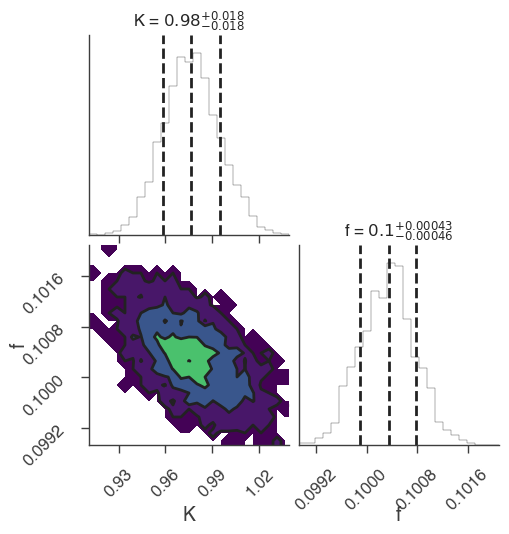

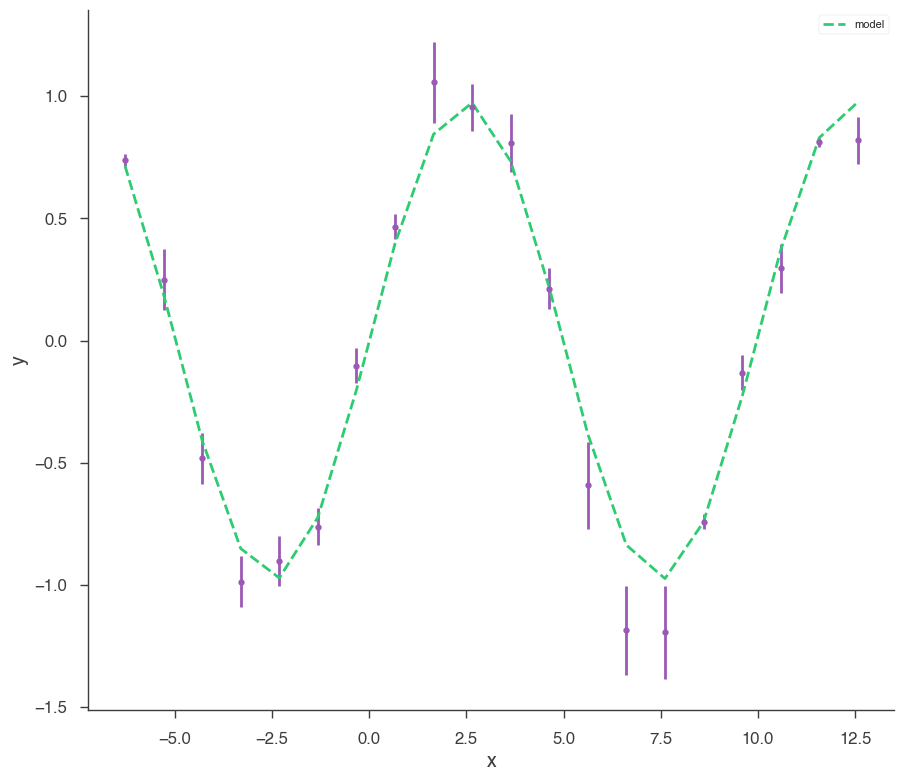

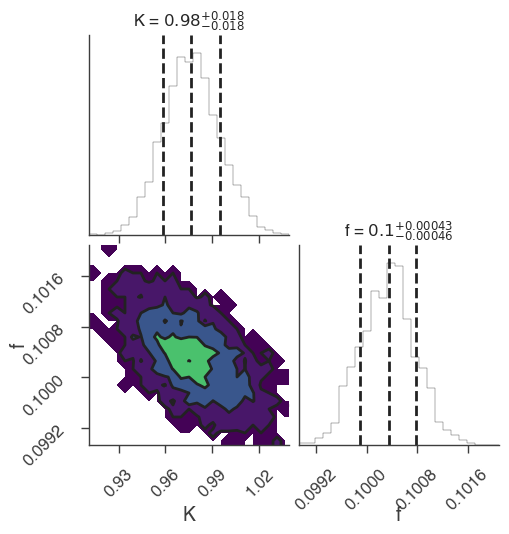

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

19:57:44 INFO      sampler set to dynesty_dynamic                                          ]8;id=896808;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=625845;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

17it [00:00, 169.19it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 17 | eff(%):  3.288 | loglstar:   -inf < -9260.079 <    inf | logz: -9267.021 +/-  0.118 | dlogz: 9392.662 >  0.010]

172it [00:00, 974.01it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 222 | eff(%): 23.823 | loglstar:   -inf < -4562.496 <    inf | logz: -4569.744 +/-  0.120 | dlogz: 4532.984 >  0.010]

323it [00:00, 1215.63it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 512 | eff(%): 31.917 | loglstar:   -inf < -3480.325 <    inf | logz: -3487.878 +/-  0.123 | dlogz: 3455.851 >  0.010]

461it [00:00, 1279.87it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 830 | eff(%): 34.662 | loglstar:   -inf < -2744.774 <    inf | logz: -2751.489 +/-  0.114 | dlogz: 2708.896 >  0.010]

589it [00:00, 1162.51it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1235 | eff(%): 33.948 | loglstar:   -inf < -2226.074 <    inf | logz: -2233.838 +/-  0.120 | dlogz: 2191.895 >  0.010]

707it [00:00, 1037.46it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 1779 | eff(%): 31.022 | loglstar:   -inf < -1959.850 <    inf | logz: -1967.067 +/-  0.117 | dlogz: 1953.598 >  0.010]

814it [00:00, 924.21it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 2359 | eff(%): 28.471 | loglstar:   -inf < -1617.747 <    inf | logz: -1625.722 +/-  0.123 | dlogz: 1612.633 >  0.010] 

910it [00:00, 796.54it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 2949 | eff(%): 26.384 | loglstar:   -inf < -1384.453 <    inf | logz: -1392.939 +/-  0.126 | dlogz: 1380.182 >  0.010] 

994it [00:01, 758.57it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 3480 | eff(%): 24.975 | loglstar:   -inf < -1247.057 <    inf | logz: -1255.948 +/-  0.133 | dlogz: 1247.082 >  0.010]

1073it [00:01, 624.97it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 4258 | eff(%): 22.551 | loglstar:   -inf < -1133.810 <    inf | logz: -1142.311 +/-  0.125 | dlogz: 1128.624 >  0.010]

1140it [00:01, 575.22it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 4840 | eff(%): 21.348 | loglstar:   -inf < -1061.830 <    inf | logz: -1070.606 +/-  0.127 | dlogz: 1056.928 >  0.010] 

1201it [00:01, 541.01it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 5403 | eff(%): 20.346 | loglstar:   -inf < -988.465 <    inf | logz: -997.558 +/-  0.130 | dlogz: 984.291 >  0.010]   

1257it [00:01, 467.72it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 6183 | eff(%): 18.809 | loglstar:   -inf < -917.946 <    inf | logz: -925.486 +/-  0.119 | dlogz: 910.319 >  0.010]

1306it [00:01, 440.07it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 6749 | eff(%): 18.016 | loglstar:   -inf < -853.872 <    inf | logz: -862.533 +/-  0.125 | dlogz: 847.826 >  0.010]

1352it [00:02, 397.40it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 7293 | eff(%): 17.349 | loglstar:   -inf < -817.421 <    inf | logz: -825.394 +/-  0.120 | dlogz: 810.190 >  0.010]

1393it [00:02, 332.78it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 8016 | eff(%): 16.357 | loglstar:   -inf < -788.804 <    inf | logz: -797.296 +/-  0.122 | dlogz: 782.075 >  0.010]

1428it [00:02, 302.74it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 8570 | eff(%): 15.744 | loglstar:   -inf < -765.242 <    inf | logz: -773.790 +/-  0.122 | dlogz: 758.523 >  0.010] 

1460it [00:02, 281.33it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 9103 | eff(%): 15.204 | loglstar:   -inf < -749.283 <    inf | logz: -757.509 +/-  0.124 | dlogz: 742.076 >  0.010]

1489it [00:02, 260.53it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 9729 | eff(%): 14.557 | loglstar:   -inf < -732.388 <    inf | logz: -740.580 +/-  0.120 | dlogz: 724.982 >  0.010]

1516it [00:02, 230.88it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 10407 | eff(%): 13.899 | loglstar:   -inf < -718.583 <    inf | logz: -727.101 +/-  0.122 | dlogz: 711.545 >  0.010]

1540it [00:02, 223.92it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 10928 | eff(%): 13.476 | loglstar:   -inf < -678.339 <    inf | logz: -688.028 +/-  0.135 | dlogz: 673.782 >  0.010] 

1571it [00:03, 241.85it/s, batch: 0 | bound: 0 | nc: 57 | ncall: 11416 | eff(%): 13.184 | loglstar:   -inf < -614.706 <    inf | logz: -622.852 +/-  0.123 | dlogz: 607.031 >  0.010]

1596it [00:03, 212.20it/s, batch: 0 | bound: 0 | nc: 22 | ncall: 12070 | eff(%): 12.697 | loglstar:   -inf < -581.180 <    inf | logz: -590.567 +/-  0.130 | dlogz: 575.350 >  0.010]

1618it [00:03, 191.36it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 12617 | eff(%): 12.335 | loglstar:   -inf < -558.852 <    inf | logz: -567.837 +/-  0.127 | dlogz: 552.188 >  0.010] 

1638it [00:03, 182.71it/s, batch: 0 | bound: 0 | nc: 65 | ncall: 13238 | eff(%): 11.923 | loglstar:   -inf < -535.674 <    inf | logz: -544.965 +/-  0.131 | dlogz: 530.646 >  0.010]

1664it [00:03, 200.87it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 13678 | eff(%): 11.736 | loglstar:   -inf < -509.614 <    inf | logz: -519.239 +/-  0.130 | dlogz: 504.821 >  0.010]

1685it [00:03, 185.89it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 14304 | eff(%): 11.382 | loglstar:   -inf < -491.740 <    inf | logz: -500.516 +/-  0.127 | dlogz: 485.508 >  0.010]

1705it [00:03, 174.92it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 14866 | eff(%): 11.096 | loglstar:   -inf < -470.866 <    inf | logz: -481.005 +/-  0.139 | dlogz: 467.888 >  0.010] 

1723it [00:03, 161.83it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 15363 | eff(%): 10.862 | loglstar:   -inf < -446.354 <    inf | logz: -456.249 +/-  0.135 | dlogz: 442.215 >  0.010]

1740it [00:04, 149.67it/s, batch: 0 | bound: 0 | nc: 160 | ncall: 15987 | eff(%): 10.554 | loglstar:   -inf < -428.606 <    inf | logz: -438.223 +/-  0.136 | dlogz: 423.966 >  0.010]

1756it [00:04, 138.35it/s, batch: 0 | bound: 0 | nc: 56 | ncall: 16686 | eff(%): 10.218 | loglstar:   -inf < -415.786 <    inf | logz: -425.221 +/-  0.132 | dlogz: 410.453 >  0.010] 

1772it [00:04, 140.54it/s, batch: 0 | bound: 0 | nc: 69 | ncall: 17216 | eff(%): 10.002 | loglstar:   -inf < -395.481 <    inf | logz: -405.139 +/-  0.134 | dlogz: 390.618 >  0.010]

1787it [00:04, 101.77it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17286 | eff(%): 10.047 | loglstar:   -inf < -381.679 <    inf | logz: -391.086 +/-  0.133 | dlogz: 376.265 >  0.010] 

1929it [00:04, 368.62it/s, batch: 0 | bound: 1 | nc: 7 | ncall: 17525 | eff(%): 10.702 | loglstar:   -inf < -289.860 <    inf | logz: -298.611 +/-  0.128 | dlogz: 282.987 >  0.010]

2065it [00:04, 591.04it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17798 | eff(%): 11.285 | loglstar:   -inf < -232.164 <    inf | logz: -241.201 +/-  0.129 | dlogz: 225.313 >  0.010]

2153it [00:05, 441.91it/s, batch: 0 | bound: 2 | nc: 3 | ncall: 18023 | eff(%): 11.623 | loglstar:   -inf < -196.349 <    inf | logz: -205.330 +/-  0.127 | dlogz: 189.436 >  0.010]

2314it [00:05, 661.45it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18269 | eff(%): 12.329 | loglstar:   -inf < -146.786 <    inf | logz: -156.627 +/-  0.132 | dlogz: 140.523 >  0.010]

2442it [00:05, 791.76it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18529 | eff(%): 12.833 | loglstar:   -inf < -117.006 <    inf | logz: -126.362 +/-  0.130 | dlogz: 109.850 >  0.010]

2545it [00:05, 565.07it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18774 | eff(%): 13.204 | loglstar:   -inf < -102.298 <    inf | logz: -111.610 +/-  0.128 | dlogz: 94.822 >  0.010] 

2690it [00:05, 725.16it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18981 | eff(%): 13.808 | loglstar:   -inf < -78.133 <    inf | logz: -87.953 +/-  0.133 | dlogz: 70.917 >  0.010]  

2822it [00:05, 846.66it/s, batch: 0 | bound: 3 | nc: 6 | ncall: 19237 | eff(%): 14.298 | loglstar:   -inf < -63.494 <    inf | logz: -72.941 +/-  0.131 | dlogz: 55.559 >  0.010]

2936it [00:06, 618.85it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19522 | eff(%): 14.664 | loglstar:   -inf < -53.866 <    inf | logz: -63.116 +/-  0.130 | dlogz: 45.933 >  0.010]

3091it [00:06, 786.42it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19717 | eff(%): 15.289 | loglstar:   -inf < -41.809 <    inf | logz: -51.768 +/-  0.131 | dlogz: 34.309 >  0.010]

3226it [00:06, 898.58it/s, batch: 0 | bound: 4 | nc: 8 | ncall: 19966 | eff(%): 15.763 | loglstar:   -inf < -34.768 <    inf | logz: -44.395 +/-  0.131 | dlogz: 26.632 >  0.010]

3344it [00:06, 960.47it/s, batch: 0 | bound: 4 | nc: 11 | ncall: 20266 | eff(%): 16.103 | loglstar:   -inf < -29.354 <    inf | logz: -39.035 +/-  0.132 | dlogz: 21.030 >  0.010]

3460it [00:06, 691.54it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20414 | eff(%): 16.544 | loglstar:   -inf < -25.529 <    inf | logz: -35.136 +/-  0.131 | dlogz: 16.888 >  0.010] 

3597it [00:06, 821.81it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20664 | eff(%): 16.996 | loglstar:   -inf < -22.247 <    inf | logz: -31.629 +/-  0.130 | dlogz: 13.097 >  0.010]

3731it [00:06, 932.67it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20955 | eff(%): 17.390 | loglstar:   -inf < -20.135 <    inf | logz: -29.508 +/-  0.130 | dlogz: 10.703 >  0.010]

3846it [00:07, 653.82it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21135 | eff(%): 17.777 | loglstar:   -inf < -18.342 <    inf | logz: -27.935 +/-  0.130 | dlogz:  8.901 >  0.010]

3997it [00:07, 809.88it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21361 | eff(%): 18.284 | loglstar:   -inf < -16.287 <    inf | logz: -26.017 +/-  0.132 | dlogz:  6.680 >  0.010]

4106it [00:07, 867.34it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21593 | eff(%): 18.585 | loglstar:   -inf < -15.250 <    inf | logz: -24.917 +/-  0.132 | dlogz:  5.362 >  0.010]

4215it [00:07, 609.08it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21818 | eff(%): 18.886 | loglstar:   -inf < -14.507 <    inf | logz: -24.110 +/-  0.131 | dlogz:  4.344 >  0.010]

4366it [00:07, 768.95it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22024 | eff(%): 19.384 | loglstar:   -inf < -13.670 <    inf | logz: -23.264 +/-  0.131 | dlogz:  3.223 >  0.010]

4502it [00:08, 886.76it/s, batch: 0 | bound: 7 | nc: 5 | ncall: 22271 | eff(%): 19.771 | loglstar:   -inf < -13.128 <    inf | logz: -22.706 +/-  0.131 | dlogz:  2.442 >  0.010]

4617it [00:08, 642.25it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22539 | eff(%): 20.040 | loglstar:   -inf < -12.782 <    inf | logz: -22.338 +/-  0.131 | dlogz:  1.916 >  0.010]

4775it [00:08, 809.02it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22744 | eff(%): 20.543 | loglstar:   -inf < -12.426 <    inf | logz: -21.967 +/-  0.131 | dlogz:  1.366 >  0.010]

4914it [00:08, 926.86it/s, batch: 0 | bound: 8 | nc: 4 | ncall: 23004 | eff(%): 20.907 | loglstar:   -inf < -12.138 <    inf | logz: -21.718 +/-  0.131 | dlogz:  1.002 >  0.010]

5034it [00:08, 669.30it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23280 | eff(%): 21.169 | loglstar:   -inf < -11.977 <    inf | logz: -21.551 +/-  0.131 | dlogz:  0.764 >  0.010]

5215it [00:08, 872.78it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23510 | eff(%): 21.720 | loglstar:   -inf < -11.789 <    inf | logz: -21.363 +/-  0.131 | dlogz:  0.508 >  0.010]

5359it [00:09, 987.36it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 23758 | eff(%): 22.092 | loglstar:   -inf < -11.676 <    inf | logz: -21.256 +/-  0.131 | dlogz:  0.369 >  0.010]

5487it [00:09, 701.75it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24038 | eff(%): 22.361 | loglstar:   -inf < -11.610 <    inf | logz: -21.184 +/-  0.131 | dlogz:  0.279 >  0.010]

5668it [00:09, 896.73it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24263 | eff(%): 22.889 | loglstar:   -inf < -11.538 <    inf | logz: -21.108 +/-  0.131 | dlogz:  0.189 >  0.010]

5818it [00:09, 1017.56it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24537 | eff(%): 23.238 | loglstar:   -inf < -11.489 <    inf | logz: -21.063 +/-  0.131 | dlogz:  0.137 >  0.010]

5951it [00:09, 714.00it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24811 | eff(%): 23.512 | loglstar:   -inf < -11.459 <    inf | logz: -21.033 +/-  0.131 | dlogz:  0.104 >  0.010] 

6100it [00:09, 847.70it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25046 | eff(%): 23.878 | loglstar:   -inf < -11.435 <    inf | logz: -21.008 +/-  0.131 | dlogz:  0.076 >  0.010]

6237it [00:10, 950.36it/s, batch: 0 | bound: 11 | nc: 6 | ncall: 25326 | eff(%): 24.150 | loglstar:   -inf < -11.413 <    inf | logz: -20.990 +/-  0.131 | dlogz:  0.058 >  0.010]

6361it [00:10, 679.97it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25580 | eff(%): 24.390 | loglstar:   -inf < -11.401 <    inf | logz: -20.978 +/-  0.131 | dlogz:  0.045 >  0.010]

6515it [00:10, 829.71it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25790 | eff(%): 24.781 | loglstar:   -inf < -11.389 <    inf | logz: -20.966 +/-  0.131 | dlogz:  0.033 >  0.010]

6645it [00:10, 922.73it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26002 | eff(%): 25.074 | loglstar:   -inf < -11.382 <    inf | logz: -20.959 +/-  0.131 | dlogz:  0.025 >  0.010]

6765it [00:10, 656.39it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26285 | eff(%): 25.257 | loglstar:   -inf < -11.376 <    inf | logz: -20.954 +/-  0.131 | dlogz:  0.020 >  0.010]

6933it [00:11, 834.53it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26496 | eff(%): 25.682 | loglstar:   -inf < -11.371 <    inf | logz: -20.948 +/-  0.131 | dlogz:  0.014 >  0.010]

7076it [00:11, 951.99it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 26723 | eff(%): 25.993 | loglstar:   -inf < -11.368 <    inf | logz: -20.945 +/-  0.131 | dlogz:  0.011 >  0.010]

7445it [00:11, 1557.95it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27106 | eff(%): 27.309 | loglstar:   -inf < -11.360 <    inf | logz: -20.937 +/-  0.131 | dlogz:  0.003 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7643it [00:12, 449.96it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 27306 | eff(%): 27.461 | loglstar: -13.254 < -13.095 < -11.837 | logz: -20.934 +/-  0.135 | stop:  1.258]          

7787it [00:12, 524.19it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27507 | eff(%): 27.778 | loglstar: -13.254 < -12.657 < -11.837 | logz: -20.934 +/-  0.135 | stop:  1.258]

7923it [00:12, 599.46it/s, batch: 1 | bound: 2 | nc: 4 | ncall: 27754 | eff(%): 28.016 | loglstar: -13.254 < -12.321 < -11.837 | logz: -20.934 +/-  0.135 | stop:  1.258]

8052it [00:13, 511.03it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28024 | eff(%): 28.203 | loglstar: -13.254 < -12.082 < -11.837 | logz: -20.934 +/-  0.135 | stop:  1.258]

8202it [00:13, 630.41it/s, batch: 1 | bound: 3 | nc: 3 | ncall: 28230 | eff(%): 28.523 | loglstar: -13.254 < -11.872 < -11.837 | logz: -20.934 +/-  0.135 | stop:  1.258]

8524it [00:13, 1011.08it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28588 | eff(%): 29.583 | loglstar: -13.254 < -11.552 < -11.837 | logz: -20.934 +/-  0.135 | stop:  1.258]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8740it [00:14, 374.73it/s, batch: 2 | bound: 0 | nc: 1 | ncall: 28814 | eff(%): 30.332 | loglstar: -13.778 < -12.092 < -13.253 | logz: -20.919 +/-  0.110 | stop:  1.159] 

8869it [00:14, 435.57it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 28990 | eff(%): 30.026 | loglstar: -13.778 < -13.293 < -13.253 | logz: -20.919 +/-  0.110 | stop:  1.159]

9163it [00:14, 664.82it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29307 | eff(%): 31.008 | loglstar: -13.778 < -12.192 < -13.253 | logz: -20.919 +/-  0.110 | stop:  1.159]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9378it [00:16, 288.55it/s, batch: 3 | bound: 0 | nc: 1 | ncall: 29550 | eff(%): 31.736 | loglstar: -14.148 < -12.332 < -13.777 | logz: -20.924 +/-  0.103 | stop:  1.012]

9539it [00:16, 359.77it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 29730 | eff(%): 31.600 | loglstar: -14.148 < -13.433 < -13.777 | logz: -20.924 +/-  0.103 | stop:  1.012]

9836it [00:16, 546.36it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30055 | eff(%): 32.584 | loglstar: -14.148 < -11.980 < -13.777 | logz: -20.924 +/-  0.103 | stop:  1.012]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9959it [00:17, 560.32it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30187 | eff(%): 32.991 | loglstar: -14.148 < -11.365 < -13.777 | logz: -20.924 +/-  0.103 | stop:  0.989]

19:58:03 INFO      fit restored to maximum of posterior                                         ]8;id=182907;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=262525;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=146285;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=550396;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.18 +0.17) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.003 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.333669
total,-11.333669


Values of statistical measures:

,statistical measures
AIC,27.373220
BIC,28.658803
DIC,26.658974
PDIC,1.995565
log(Z),-9.093701


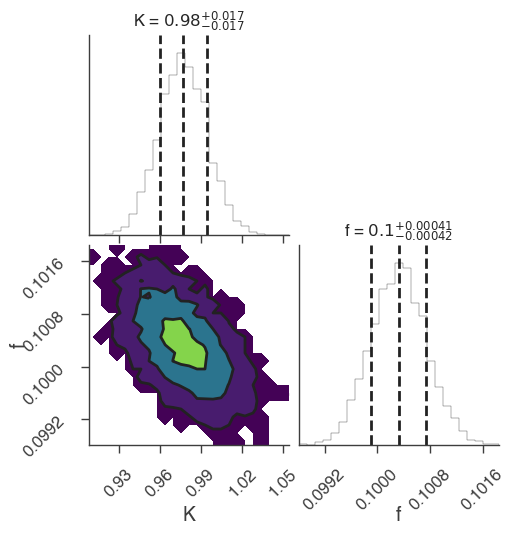

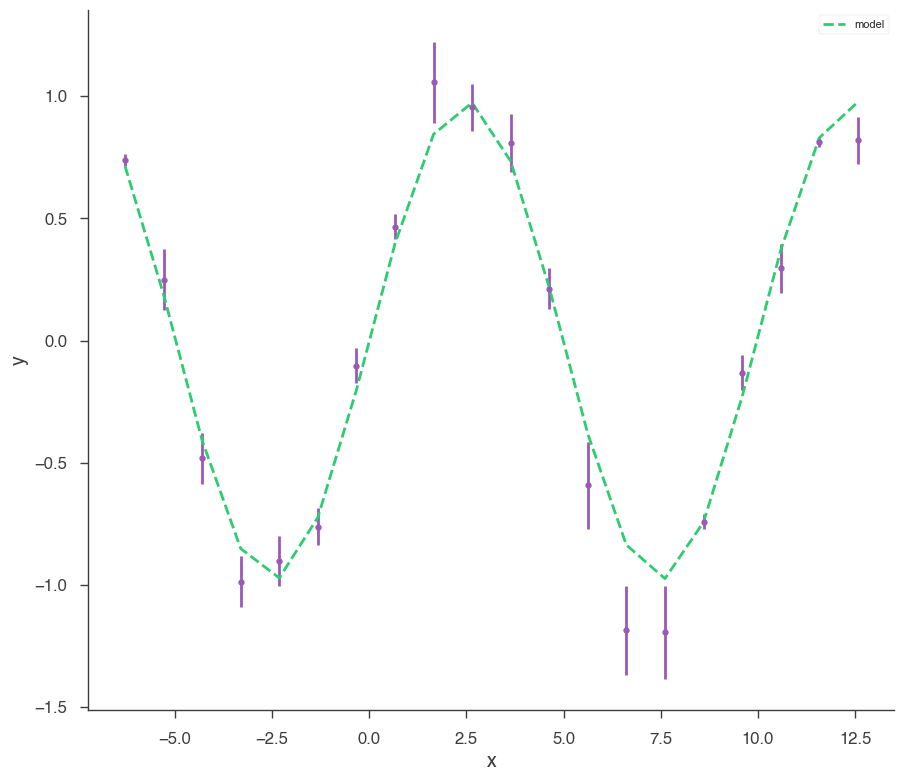

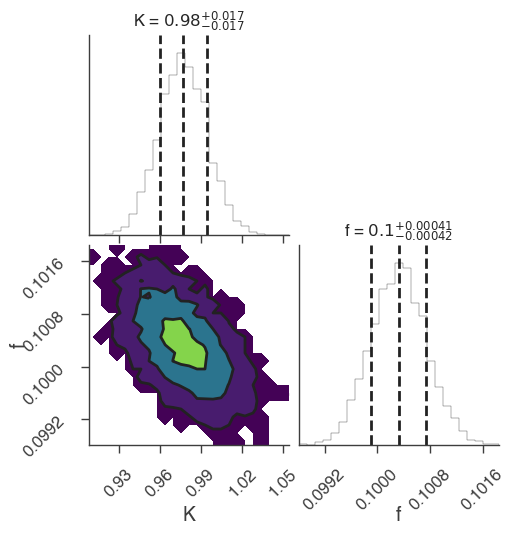

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

19:58:05 INFO      sampler set to zeus                                                     ]8;id=7280;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=393241;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   0%|          | 3/625 [00:00<00:27, 22.70it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:24, 25.03it/s]

Sampling progress :   1%|▏         | 9/625 [00:00<00:23, 25.84it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:22, 26.99it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:20, 30.38it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:18, 31.94it/s]

Sampling progress :   4%|▍         | 24/625 [00:00<00:19, 30.77it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:19, 30.19it/s]

Sampling progress :   5%|▌         | 32/625 [00:01<00:18, 31.25it/s]

Sampling progress :   6%|▌         | 36/625 [00:01<00:18, 32.63it/s]

Sampling progress :   6%|▋         | 40/625 [00:01<00:18, 31.09it/s]

Sampling progress :   7%|▋         | 44/625 [00:01<00:18, 31.78it/s]

Sampling progress :   8%|▊         | 48/625 [00:01<00:17, 32.54it/s]

Sampling progress :   8%|▊         | 52/625 [00:01<00:17, 32.77it/s]

Sampling progress :   9%|▉         | 56/625 [00:01<00:17, 32.54it/s]

Sampling progress :  10%|▉         | 60/625 [00:01<00:17, 32.25it/s]

Sampling progress :  10%|█         | 64/625 [00:02<00:18, 30.95it/s]

Sampling progress :  11%|█         | 68/625 [00:02<00:17, 31.51it/s]

Sampling progress :  12%|█▏        | 72/625 [00:02<00:18, 30.37it/s]

Sampling progress :  12%|█▏        | 76/625 [00:02<00:17, 30.71it/s]

Sampling progress :  13%|█▎        | 80/625 [00:02<00:18, 29.75it/s]

Sampling progress :  13%|█▎        | 83/625 [00:02<00:18, 28.81it/s]

Sampling progress :  14%|█▍        | 86/625 [00:02<00:19, 28.20it/s]

Sampling progress :  14%|█▍        | 90/625 [00:02<00:18, 29.31it/s]

Sampling progress :  15%|█▌        | 94/625 [00:03<00:17, 30.16it/s]

Sampling progress :  16%|█▌        | 98/625 [00:03<00:18, 28.86it/s]

Sampling progress :  16%|█▋        | 102/625 [00:03<00:17, 30.21it/s]

Sampling progress :  17%|█▋        | 106/625 [00:03<00:16, 31.58it/s]

Sampling progress :  18%|█▊        | 110/625 [00:03<00:16, 31.51it/s]

Sampling progress :  18%|█▊        | 114/625 [00:03<00:16, 31.22it/s]

Sampling progress :  19%|█▉        | 118/625 [00:03<00:16, 31.16it/s]

Sampling progress :  20%|█▉        | 122/625 [00:03<00:16, 31.16it/s]

Sampling progress :  20%|██        | 126/625 [00:04<00:16, 30.30it/s]

Sampling progress :  21%|██        | 130/625 [00:04<00:16, 30.25it/s]

Sampling progress :  21%|██▏       | 134/625 [00:04<00:15, 30.92it/s]

Sampling progress :  22%|██▏       | 138/625 [00:04<00:15, 31.75it/s]

Sampling progress :  23%|██▎       | 142/625 [00:04<00:15, 30.97it/s]

Sampling progress :  23%|██▎       | 146/625 [00:04<00:14, 32.69it/s]

Sampling progress :  24%|██▍       | 150/625 [00:04<00:14, 32.07it/s]

Sampling progress :  25%|██▍       | 154/625 [00:05<00:15, 30.46it/s]

Sampling progress :  25%|██▌       | 158/625 [00:05<00:14, 31.31it/s]

Sampling progress :  26%|██▌       | 162/625 [00:05<00:14, 31.12it/s]

Sampling progress :  27%|██▋       | 166/625 [00:05<00:14, 30.94it/s]

Sampling progress :  27%|██▋       | 170/625 [00:05<00:14, 30.49it/s]

Sampling progress :  28%|██▊       | 174/625 [00:05<00:15, 29.99it/s]

Sampling progress :  28%|██▊       | 178/625 [00:05<00:14, 30.37it/s]

Sampling progress :  29%|██▉       | 182/625 [00:05<00:14, 31.00it/s]

Sampling progress :  30%|██▉       | 186/625 [00:06<00:14, 31.36it/s]

Sampling progress :  30%|███       | 190/625 [00:06<00:13, 31.20it/s]

Sampling progress :  31%|███       | 194/625 [00:06<00:14, 29.97it/s]

Sampling progress :  32%|███▏      | 198/625 [00:06<00:14, 28.86it/s]

Sampling progress :  32%|███▏      | 201/625 [00:06<00:16, 25.58it/s]

Sampling progress :  33%|███▎      | 204/625 [00:06<00:16, 26.31it/s]

Sampling progress :  33%|███▎      | 207/625 [00:06<00:15, 26.41it/s]

Sampling progress :  34%|███▎      | 210/625 [00:06<00:15, 27.21it/s]

Sampling progress :  34%|███▍      | 213/625 [00:07<00:14, 27.94it/s]

Sampling progress :  35%|███▍      | 217/625 [00:07<00:13, 29.82it/s]

Sampling progress :  35%|███▌      | 221/625 [00:07<00:13, 29.49it/s]

Sampling progress :  36%|███▌      | 224/625 [00:07<00:13, 29.48it/s]

Sampling progress :  36%|███▋      | 228/625 [00:07<00:13, 30.21it/s]

Sampling progress :  37%|███▋      | 232/625 [00:07<00:12, 30.53it/s]

Sampling progress :  38%|███▊      | 236/625 [00:07<00:12, 30.62it/s]

Sampling progress :  38%|███▊      | 240/625 [00:07<00:12, 30.94it/s]

Sampling progress :  39%|███▉      | 244/625 [00:08<00:12, 30.51it/s]

Sampling progress :  40%|███▉      | 248/625 [00:08<00:12, 30.88it/s]

Sampling progress :  40%|████      | 252/625 [00:08<00:11, 31.58it/s]

Sampling progress :  41%|████      | 256/625 [00:08<00:12, 29.03it/s]

Sampling progress :  41%|████▏     | 259/625 [00:08<00:12, 28.27it/s]

Sampling progress :  42%|████▏     | 262/625 [00:08<00:13, 27.84it/s]

Sampling progress :  42%|████▏     | 265/625 [00:08<00:12, 27.74it/s]

Sampling progress :  43%|████▎     | 269/625 [00:08<00:12, 29.02it/s]

Sampling progress :  44%|████▎     | 273/625 [00:09<00:11, 30.06it/s]

Sampling progress :  44%|████▍     | 277/625 [00:09<00:12, 28.58it/s]

Sampling progress :  45%|████▍     | 281/625 [00:09<00:11, 29.79it/s]

Sampling progress :  46%|████▌     | 285/625 [00:09<00:11, 30.19it/s]

Sampling progress :  46%|████▌     | 289/625 [00:09<00:10, 30.89it/s]

Sampling progress :  47%|████▋     | 293/625 [00:09<00:10, 30.94it/s]

Sampling progress :  48%|████▊     | 297/625 [00:09<00:10, 30.94it/s]

Sampling progress :  48%|████▊     | 301/625 [00:09<00:10, 29.56it/s]

Sampling progress :  49%|████▊     | 304/625 [00:10<00:11, 29.06it/s]

Sampling progress :  49%|████▉     | 307/625 [00:10<00:11, 27.97it/s]

Sampling progress :  50%|████▉     | 310/625 [00:10<00:11, 28.23it/s]

Sampling progress :  50%|█████     | 314/625 [00:10<00:10, 29.54it/s]

Sampling progress :  51%|█████     | 317/625 [00:10<00:10, 28.93it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:10<00:10, 29.94it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:10<00:09, 31.31it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:10<00:09, 31.76it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:11<00:09, 30.04it/s]

Sampling progress :  54%|█████▍    | 337/625 [00:11<00:09, 28.83it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:11<00:09, 29.71it/s]

Sampling progress :  55%|█████▌    | 344/625 [00:11<00:09, 29.40it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:11<00:09, 28.84it/s]

Sampling progress :  56%|█████▌    | 351/625 [00:11<00:09, 30.00it/s]

Sampling progress :  57%|█████▋    | 355/625 [00:11<00:09, 29.63it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:11<00:09, 29.53it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:12<00:08, 31.39it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:12<00:08, 30.88it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:12<00:08, 30.79it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:12<00:07, 31.40it/s]

Sampling progress :  60%|██████    | 378/625 [00:12<00:07, 32.11it/s]

Sampling progress :  61%|██████    | 382/625 [00:12<00:07, 32.72it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:12<00:07, 32.65it/s]

Sampling progress :  62%|██████▏   | 390/625 [00:12<00:07, 32.10it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:13<00:07, 31.96it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:13<00:07, 31.08it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:13<00:07, 30.10it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:13<00:07, 29.91it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:13<00:06, 30.97it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:13<00:06, 31.37it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:13<00:06, 32.37it/s]

Sampling progress :  68%|██████▊   | 422/625 [00:13<00:06, 31.50it/s]

Sampling progress :  68%|██████▊   | 426/625 [00:14<00:06, 31.87it/s]

Sampling progress :  69%|██████▉   | 430/625 [00:14<00:06, 31.33it/s]

Sampling progress :  69%|██████▉   | 434/625 [00:14<00:06, 30.48it/s]

Sampling progress :  70%|███████   | 438/625 [00:14<00:06, 28.86it/s]

Sampling progress :  71%|███████   | 441/625 [00:14<00:06, 28.58it/s]

Sampling progress :  71%|███████   | 444/625 [00:14<00:06, 28.11it/s]

Sampling progress :  72%|███████▏  | 447/625 [00:14<00:06, 27.78it/s]

Sampling progress :  72%|███████▏  | 450/625 [00:14<00:06, 27.53it/s]

Sampling progress :  73%|███████▎  | 454/625 [00:15<00:05, 30.07it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:15<00:05, 30.78it/s]

Sampling progress :  74%|███████▍  | 462/625 [00:15<00:05, 31.31it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:15<00:05, 29.99it/s]

Sampling progress :  75%|███████▌  | 470/625 [00:15<00:05, 30.16it/s]

Sampling progress :  76%|███████▌  | 474/625 [00:15<00:05, 29.79it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:15<00:04, 30.75it/s]

Sampling progress :  77%|███████▋  | 482/625 [00:15<00:04, 31.34it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:16<00:04, 31.40it/s]

Sampling progress :  78%|███████▊  | 490/625 [00:16<00:04, 31.22it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:16<00:04, 30.58it/s]

Sampling progress :  80%|███████▉  | 498/625 [00:16<00:04, 28.74it/s]

Sampling progress :  80%|████████  | 501/625 [00:16<00:04, 27.11it/s]

Sampling progress :  81%|████████  | 504/625 [00:16<00:04, 26.42it/s]

Sampling progress :  81%|████████  | 507/625 [00:16<00:05, 22.97it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:17<00:04, 23.60it/s]

Sampling progress :  82%|████████▏ | 513/625 [00:17<00:04, 23.86it/s]

Sampling progress :  83%|████████▎ | 516/625 [00:17<00:04, 22.89it/s]

Sampling progress :  83%|████████▎ | 519/625 [00:17<00:04, 23.82it/s]

Sampling progress :  84%|████████▎ | 522/625 [00:17<00:04, 20.87it/s]

Sampling progress :  84%|████████▍ | 525/625 [00:17<00:04, 21.90it/s]

Sampling progress :  84%|████████▍ | 528/625 [00:17<00:04, 21.79it/s]

Sampling progress :  85%|████████▍ | 531/625 [00:17<00:04, 22.79it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:18<00:03, 23.25it/s]

Sampling progress :  86%|████████▌ | 537/625 [00:18<00:03, 22.63it/s]

Sampling progress :  86%|████████▋ | 540/625 [00:18<00:03, 22.27it/s]

Sampling progress :  87%|████████▋ | 543/625 [00:18<00:03, 21.86it/s]

Sampling progress :  87%|████████▋ | 546/625 [00:18<00:03, 21.46it/s]

Sampling progress :  88%|████████▊ | 549/625 [00:18<00:03, 21.40it/s]

Sampling progress :  88%|████████▊ | 552/625 [00:18<00:03, 22.91it/s]

Sampling progress :  89%|████████▉ | 555/625 [00:19<00:02, 23.74it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:19<00:02, 24.57it/s]

Sampling progress :  90%|████████▉ | 562/625 [00:19<00:02, 26.81it/s]

Sampling progress :  90%|█████████ | 565/625 [00:19<00:02, 26.68it/s]

Sampling progress :  91%|█████████ | 569/625 [00:19<00:01, 29.69it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:19<00:01, 29.04it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:19<00:01, 27.48it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:19<00:01, 25.58it/s]

Sampling progress :  93%|█████████▎| 582/625 [00:20<00:01, 25.44it/s]

Sampling progress :  94%|█████████▎| 585/625 [00:20<00:01, 25.91it/s]

Sampling progress :  94%|█████████▍| 589/625 [00:20<00:01, 27.80it/s]

Sampling progress :  95%|█████████▍| 593/625 [00:20<00:01, 28.95it/s]

Sampling progress :  95%|█████████▌| 596/625 [00:20<00:01, 28.53it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:20<00:00, 28.55it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:20<00:00, 29.26it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:20<00:00, 30.28it/s]

Sampling progress :  98%|█████████▊| 611/625 [00:21<00:00, 29.65it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:21<00:00, 28.33it/s]

Sampling progress :  99%|█████████▊| 617/625 [00:21<00:00, 28.55it/s]

Sampling progress :  99%|█████████▉| 620/625 [00:21<00:00, 28.60it/s]

Sampling progress : 100%|█████████▉| 623/625 [00:21<00:00, 28.88it/s]

Sampling progress : 100%|██████████| 625/625 [00:21<00:00, 29.06it/s]

19:58:27 INFO      fit restored to maximum of posterior                                         ]8;id=746926;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=817230;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=573710;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=132842;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 14


Scale Factor: 1.304068


Mean Integrated Autocorrelation Time: 2.78


Effective Sample Size: 4488.56


Number of Log Probability Evaluations: 65092


Effective Samples per Log Probability Evaluation: 0.068957


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 -0.17 +0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.003 +/- 0.004) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.333769
total,-11.333769


Values of statistical measures:

,statistical measures
AIC,27.373421
BIC,28.659003
DIC,26.637355
PDIC,1.983994


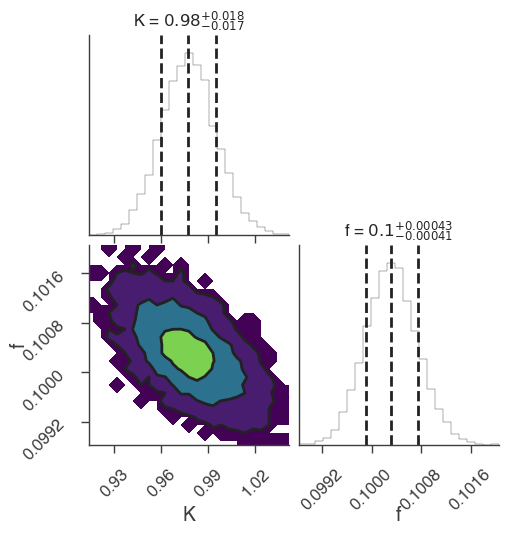

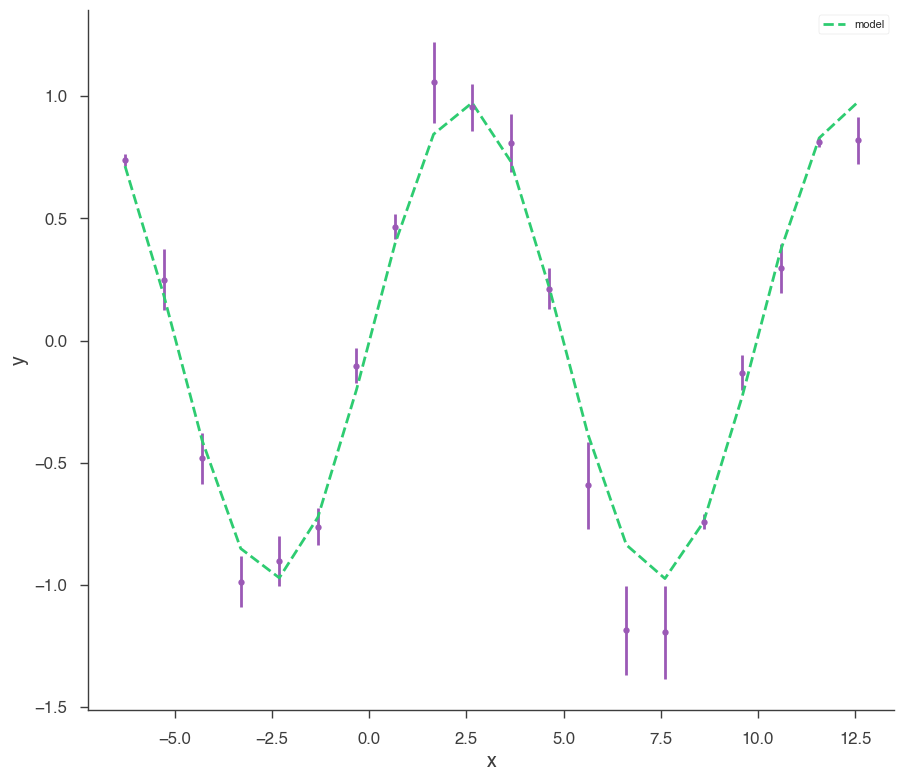

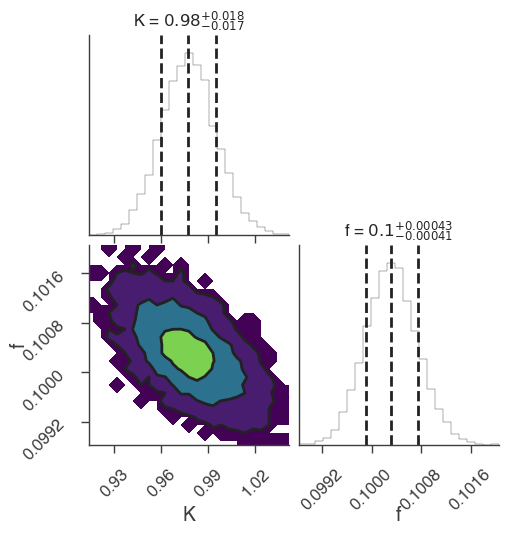

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

19:58:29 INFO      sampler set to ultranest                                                ]8;id=218832;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=880214;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-1e+01  


[ultranest] Likelihood function evaluations: 11717


[ultranest]   logZ = -20.79 +- 0.1239


[ultranest] Effective samples strategy satisfied (ESS = 985.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.12 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


19:58:45 INFO      fit restored to maximum of posterior                                         ]8;id=767263;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=983110;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=664880;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=870765;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.77 +/- 0.18) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(1.003 -0.004 +0.005) x 10^-1,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-11.336053
total,-11.336053


Values of statistical measures:

,statistical measures
AIC,27.377989
BIC,28.663571
DIC,26.815756
PDIC,2.073254
log(Z),-9.021520


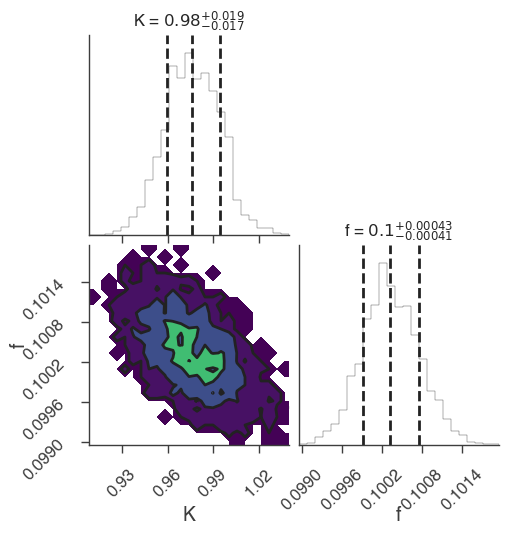

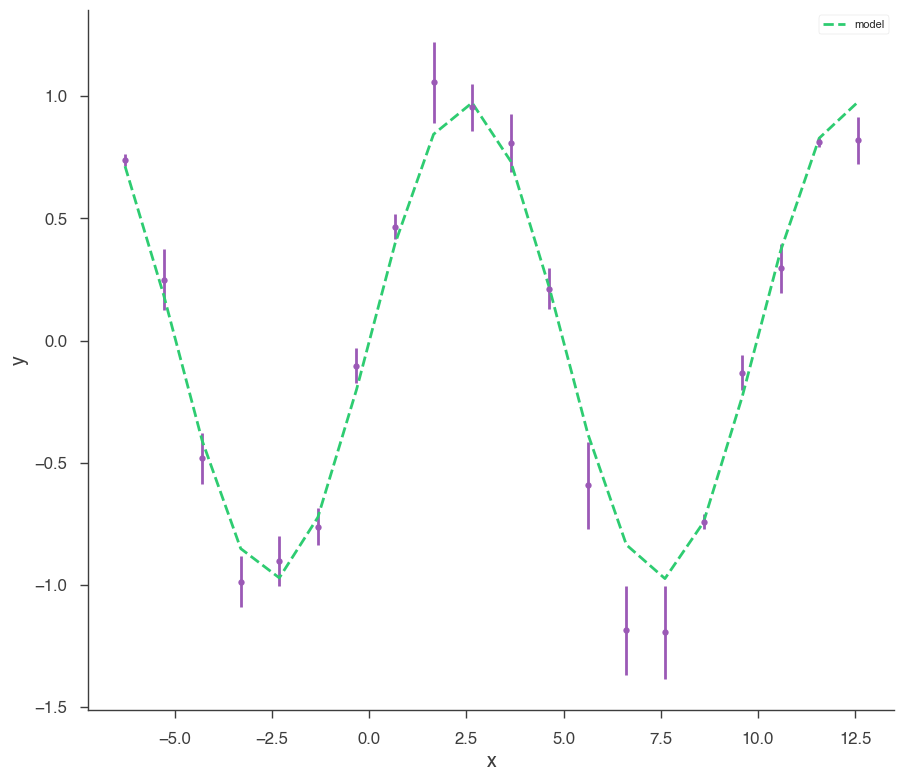

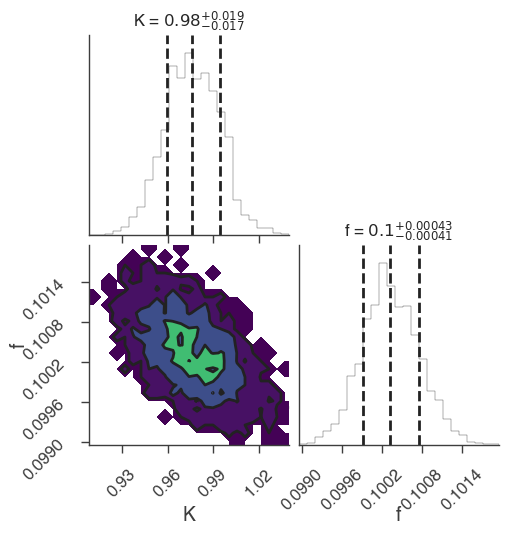

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()